# Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import LabelEncoder,StandardScaler
import csv



# Pré-Processamento

## Leitura de dados

In [2]:

file_path = 'Data/campeonatos_futebol_atualizacao.csv'

ace_df = pd.read_csv(file_path, encoding='latin-1')

In [3]:
ace_df.describe()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tratamentos 1,Tratamentos 2,SubstituiÃ§Ãµes 1,SubstituiÃ§Ãµes 2,Tiros-livres 1,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%)
count,26204.000000,26204.000000,24942.000000,24942.000000,25388.000000,25388.000000,25392.000000,25392.000000,25394.000000,25394.000000,...,5019.000000,5019.000000,9420.000000,9420.000000,6246.000000,6246.000000,6196.000000,6196.000000,25366.000000,25366.000000
mean,4.767287,3.854526,2.139844,1.968527,5.548409,4.459824,6.034302,4.956758,12.694495,12.946444,...,1.995617,2.134489,3.000318,3.001168,14.156260,14.245757,2.676888,3.206908,51.315659,48.508279
std,2.797705,2.444182,1.754924,1.681298,2.975521,2.620973,3.224260,5.451316,4.337402,4.608542,...,2.258323,2.296141,1.020285,1.033004,4.432963,4.335781,1.842689,2.078474,9.834217,9.808893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,1.000000,3.000000,3.000000,4.000000,3.000000,10.000000,10.000000,...,0.000000,0.000000,3.000000,3.000000,11.000000,11.000000,1.000000,2.000000,45.000000,42.000000
50%,4.000000,4.000000,2.000000,2.000000,5.000000,4.000000,6.000000,5.000000,12.000000,13.000000,...,1.000000,2.000000,3.000000,3.000000,14.000000,14.000000,2.000000,3.000000,52.000000,48.000000
75%,6.000000,5.000000,3.000000,3.000000,7.000000,6.000000,8.000000,7.000000,15.000000,16.000000,...,3.000000,3.000000,3.000000,3.000000,17.000000,17.000000,4.000000,4.000000,58.000000,55.000000
max,90.000000,80.000000,23.000000,15.000000,22.000000,21.000000,23.000000,748.000000,46.000000,180.000000,...,17.000000,16.000000,6.000000,6.000000,36.000000,33.000000,11.000000,17.000000,100.000000,100.000000


In [4]:
ace_df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 1,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


## Criação de colunas adicionais

In [5]:
ace_df['Resultado Time 1'] = ace_df.apply(lambda row: '0' if row['Gols 1'] > row['Gols 2'] else '1', axis=1)

## Lidar com Outliers

### Visualizar / Retirar manualmente

In [6]:
analys_flag = 0

In [7]:
# Função com método de remoção 'automático' de outliers, por meio de informações estatísticas
def remove_outliers(df, filter_cols, lowq, supq):
    # Iterate over each numerical column
    for col in filter_cols:
        # Calculate the IQR
        Q1 = df[col].quantile(lowq)
        Q3 = df[col].quantile(supq)
        IQR = Q3 - Q1
        # Define the upper and lower bounds for outliers
        fac = 1.5
        lower_bound = Q1 - fac * IQR
        upper_bound = Q3 + fac * IQR
        print(f"{col} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        # Remove outliers
        #print((df[col] <= upper_bound))
        df = df[( (df[col] <= upper_bound) | (df[col].isna()) ) ] # (df[col] >= lower_bound) & 
    print('\n')
    return df


In [8]:
numeric_columns = ace_df.select_dtypes(include='number').columns

if(analys_flag):
    for column in numeric_columns:
        print("Nome da coluna:", column)
        print("Mínimo:", ace_df[column].min())
        print("Mediana:", ace_df[column].median())
        print("Máximo:", ace_df[column].max())
        print('Razao:', ace_df[column].max()/ace_df[column].median())
        print('\n')



In [9]:
if(analys_flag):

    for column in numeric_columns:
        raz = ace_df[column].max()/ace_df[column].median()
        if (raz > 8):
            print(column)
            print(ace_df[column].max())
            print(ace_df[column].median())
            print('Razao:', ace_df[column].max()/ace_df[column].median())
            print('\n')

In [10]:
# Anotação de outliers : Faltas 2 - ~180 ; Chutes fora 2 748.0 ; Cruzamentos 1/2 ?? : 66, 63 ; 
# Chutes a gol 2 ; Chutes a gol 1 ; Cruzamentos 1 ; cruzamentos 2

In [11]:
if(analys_flag):

    # Calcular os quantis
    # var1, var2, var

    quantil_values = [0.95, 0.99 , 0.999, 0.9998,0.9999]
    quantiles_faltas2 = ace_df['Faltas 2'].quantile(quantil_values)
    quantiles_chutes_fora2 = ace_df['Chutes fora 2'].quantile(quantil_values)
    quantiles_cruzamentos2 = ace_df['Cruzamentos 2'].quantile(quantil_values)

    # Filtrar os valores superiores aos quantis
    selected1 = quantil_values[4]
    selected2 = quantil_values[3]
    selected3 =quantil_values[2]
    superiores_faltas2 = ace_df[ace_df['Faltas 2'] > quantiles_faltas2[selected1]]['Faltas 2']
    superiores_chutes_fora2 = ace_df[ace_df['Chutes fora 2'] > quantiles_chutes_fora2[selected2]]['Chutes fora 2']
    superiores_cruzamentos2 = ace_df[ace_df['Cruzamentos 2'] > quantiles_cruzamentos2[selected3]]['Cruzamentos 2']

    # Exibir os valores superiores aos quantis
    print("Valores superiores de quantil para Faltas 2:")
    print(superiores_faltas2)

    print("Valores superiores de quantil para Chutes fora 2:")
    print(superiores_chutes_fora2)

    print("Valores superiores de quantil para Cruzamentos 2:")
    print(superiores_cruzamentos2)


In [12]:
# Anotação de outliers : Faltas 2 - ~180 ; Chutes fora 2 748.0 ; Cruzamentos 1/2 ?? : 66, 63 ; 
# Chutes a gol 2 ; Chutes a gol 1 ; Cruzamentos 1 ; cruzamentos 2

### Filtragem automática por quantil / IQR

In [41]:

filter_cols =  ['Faltas 2', 'Chutes fora 2']# numeric_columns # ['Faltas 2']# # ['Faltas 2', 'Chutes fora 2',]
# Apply the remove_outliers function to ace_df
ace_df_cleaned = remove_outliers(ace_df , filter_cols, 0.0, 0.75)

index_diff = ace_df.index.difference(ace_df_cleaned.index)

for col in filter_cols:
    print(col)
    print('Antes:', ace_df[col].count())
    print('Depois:', ace_df_cleaned[col].count())
    print('Diferença:', ace_df[col].count() - ace_df_cleaned[col].count())
    # print('Diferença:', ace_df.iloc[index_diff][col])
    print('\n')


Faltas 2 - Lower Bound: -24.0, Upper Bound: 40.0
Chutes fora 2 - Lower Bound: -10.5, Upper Bound: 17.5


Faltas 2
Antes: 25394
Depois: 25363
Diferença: 31


Chutes fora 2
Antes: 25392
Depois: 25361
Diferença: 31




In [42]:
print(f"DIferença de linhas: {len(ace_df)} - {len(ace_df_cleaned)} = {len(ace_df) - len(ace_df_cleaned)}")

DIferença de linhas: 27716 - 27685 = 31


In [44]:
ace_df_cleaned

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,Tiros-livres 2,Defesas difÃ­ceis 1,Defesas difÃ­ceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2,Resultado Time 1
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3,0
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2,1
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,...,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2,1
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,...,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1,0
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,NaN,NaN,NaN,52.0,48.0,Aston Villa,Blackburn,4-4-2,4-5-1,1
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,NaN,NaN,NaN,52.0,48.0,Arsenal,Fulham,4-2-3-1,4-4-2,0
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,NaN,NaN,NaN,55.0,45.0,Manchester Utd,Stoke,4-4-2,4-4-2,0
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,NaN,NaN,NaN,45.0,55.0,West Ham,Manchester City,4-5-1,4-4-2,1


## Lidar com valores nulos

In [45]:
null_map = ace_df_cleaned.isna().sum()

In [46]:
threshold = 0.5 * len(ace_df_cleaned)
for col in numeric_columns:
    if (null_map[col] < threshold):
        ace_df_cleaned[col] = ace_df_cleaned[col].fillna(ace_df_cleaned[col].median(numeric_only= True))

In [47]:
ace_df_cleaned.isna().sum()

Chutes a gol 1              0
Chutes a gol 2              0
Impedimentos 1              0
Impedimentos 2              0
Escanteios 1                0
Escanteios 2                0
Chutes fora 1               0
Chutes fora 2               0
Faltas 1                    0
Faltas 2                    0
CartÃµes amarelos 1         0
CartÃµes amarelos 2         0
CartÃµes vermelhos 1        0
CartÃµes vermelhos 2        0
Cruzamentos 1           18671
Cruzamentos 2           18671
Laterais 1                  0
Laterais 2                  0
Chutes bloqueados 1     18843
Chutes bloqueados 2     18843
Contra-ataques 1        21422
Contra-ataques 2        21422
Gols 1                      0
Gols 2                      0
Tiro de meta 1          15670
Tiro de meta 2          15670
Tratamentos 1           22666
Tratamentos 2           22666
SubstituiÃ§Ãµes 1       18283
SubstituiÃ§Ãµes 2       18283
Tiros-livres 1          21439
Tiros-livres 2          21439
Defesas difÃ­ceis 1     21489
Defesas di

In [48]:
analys_flag = 0

In [49]:
if (analys_flag):
    # Visualização de histogramas 
    dataset = ace_df_cleaned

    num_cols = len(dataset.select_dtypes(include=['number']).columns)
    num_rows = (num_cols + 2) // 3

    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 2 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(dataset.select_dtypes(include=['number']).columns):
        try:
            sns.kdeplot(data=dataset, x=col, ax=axes[i], fill=True)
            axes[i].set_title(f'Density Plot of {col}')
        except Exception as e:
            print(f"Error plotting {col}: {e}")


    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


## Codificação de variáveis não-numéricas

In [50]:
select_df = ace_df_cleaned

In [51]:

# Crie uma cópia do dataframe ace_df
ace_df_encoded = select_df.copy()

# Instancie o LabelEncoder
label_encoder = LabelEncoder()

# Itere sobre as colunas do dataframe
for column in ace_df_encoded.columns:
    # Verifique se a coluna é do tipo 'object'
    if ace_df_encoded[column].dtype == 'object':
        # Aplique a codificação usando o LabelEncoder
        ace_df_encoded[column] = label_encoder.fit_transform(ace_df_encoded[column])

# Verifique o resultado
print(ace_df_encoded)

       Chutes a gol 1  Chutes a gol 2  Impedimentos 1  Impedimentos 2  \
0                 8.0             0.0             6.0             3.0   
1                 0.0             2.0             0.0             2.0   
2                 4.0             5.0             1.0             5.0   
3                 4.0             7.0             8.0             1.0   
4                 3.0             1.0             1.0             3.0   
...               ...             ...             ...             ...   
27711             6.0             2.0             1.0             0.0   
27712             6.0             0.0             4.0             3.0   
27713             7.0             7.0             2.0             3.0   
27714             6.0             6.0             1.0             2.0   
27715             4.0             2.0             2.0             2.0   

       Escanteios 1  Escanteios 2  Chutes fora 1  Chutes fora 2  Faltas 1  \
0               7.0           1.0            6

## Visualização 

In [23]:
plot = 0

### DF Adicionais

In [24]:
ace_df_cut1 = ace_df[['Resultado Time 1','Gols 1', 'Gols 2']]

In [25]:
ace_df_cut2 = ace_df.dropna()

In [26]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Resultado Time 1'],
      dtype='object')

In [27]:
ace_df_cut3 = ace_df.drop(columns = ['Tratamentos 1', 'Tratamentos 2','SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2' ], axis = 1)

### Visualização de 2 variáveis

In [28]:
ace_df.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Impedimentos 2',
       'Escanteios 1', 'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2',
       'Faltas 1', 'Faltas 2', 'CartÃµes amarelos 1', 'CartÃµes amarelos 2',
       'CartÃµes vermelhos 1', 'CartÃµes vermelhos 2', 'Cruzamentos 1',
       'Cruzamentos 2', 'Laterais 1', 'Laterais 2', 'Chutes bloqueados 1',
       'Chutes bloqueados 2', 'Contra-ataques 1', 'Contra-ataques 2', 'Gols 1',
       'Gols 2', 'Tiro de meta 1', 'Tiro de meta 2', 'Tratamentos 1',
       'Tratamentos 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Tiros-livres 1', 'Tiros-livres 2', 'Defesas difÃ­ceis 1',
       'Defesas difÃ­ceis 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Resultado Time 1'],
      dtype='object')

In [29]:
if(plot):
    # Visualização de var1 x var2
    plt.scatter(ace_df['Laterais 2'], ace_df['SubstituiÃ§Ãµes 2'])
    plt.xlabel('Impedimentos 1')
    plt.ylabel('Chutes a gol 1')
    plt.title('Nuvem de pontos - Impedimentos 1 x Chutes a gol 1')
    plt.show()

### Correlação Linear entre variáveis

In [30]:
if (plot):
    corr = ace_df_encoded.corr(numeric_only=True)

    plt.figure(figsize=(36, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()


## Seleção de variáveis

In [60]:
ace_df_encoded.isna().sum()

Chutes a gol 1              0
Chutes a gol 2              0
Impedimentos 1              0
Impedimentos 2              0
Escanteios 1                0
Escanteios 2                0
Chutes fora 1               0
Chutes fora 2               0
Faltas 1                    0
Faltas 2                    0
CartÃµes amarelos 1         0
CartÃµes amarelos 2         0
CartÃµes vermelhos 1        0
CartÃµes vermelhos 2        0
Cruzamentos 1           18671
Cruzamentos 2           18671
Laterais 1                  0
Laterais 2                  0
Chutes bloqueados 1     18843
Chutes bloqueados 2     18843
Contra-ataques 1        21422
Contra-ataques 2        21422
Gols 1                      0
Gols 2                      0
Tiro de meta 1          15670
Tiro de meta 2          15670
Tratamentos 1           22666
Tratamentos 2           22666
SubstituiÃ§Ãµes 1       18283
SubstituiÃ§Ãµes 2       18283
Tiros-livres 1          21439
Tiros-livres 2          21439
Defesas difÃ­ceis 1     21489
Defesas di

In [61]:
null_columns = ace_df_encoded.columns[ace_df_encoded.isnull().any()].tolist()

null_columns

['Cruzamentos 1',
 'Cruzamentos 2',
 'Chutes bloqueados 1',
 'Chutes bloqueados 2',
 'Contra-ataques 1',
 'Contra-ataques 2',
 'Tiro de meta 1',
 'Tiro de meta 2',
 'Tratamentos 1',
 'Tratamentos 2',
 'SubstituiÃ§Ãµes 1',
 'SubstituiÃ§Ãµes 2',
 'Tiros-livres 1',
 'Tiros-livres 2',
 'Defesas difÃ\xadceis 1',
 'Defesas difÃ\xadceis 2']

In [62]:
# selected_variables = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Faltas 1', 'Faltas 2', 'Laterais 1', 'Posse 1(%)', 'Time 1', 'Time 2', 'Position 1'] + ['Gols 1', 'Gols 2', 'Resultado Time 1']
selected_variables = ['Chutes a gol 1', 'Escanteios 1', 'CartÃµes amarelos 1',
       'CartÃµes vermelhos 2', 'Cruzamentos 1', 'Laterais 1',
       'Contra-ataques 2', 'SubstituiÃ§Ãµes 1', 'SubstituiÃ§Ãµes 2',
       'Defesas difÃ­ceis 2'] + ['Gols 1', 'Gols 2', 'Resultado Time 1']

selected_variables2 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
       'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1', 'Laterais 1',
       'Time 1', 'Time 2']
selected_variables3 = ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Escanteios 2',
       'Time 1']
selected_variables4 = ['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Escanteios 1',
       'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1',
       'CartÃµes amarelos 2', 'Laterais 1', 'Laterais 2', 'Time 1', 'Time 2',
       'Position 1', 'Position 2']
ace_df_encoded_cut = ace_df_encoded.drop(null_columns,axis = 1) #[selected_variables]


ace_df_encoded_cut = ace_df_encoded_cut[selected_variables4  + ['Gols 1', 'Gols 2', 'Resultado Time 1']]
# ace_df_encoded_cut = ace_df_encoded

In [63]:
ace_df_encoded_cut

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,CartÃµes amarelos 1,CartÃµes amarelos 2,Laterais 1,Laterais 2,Time 1,Time 2,Position 1,Position 2,Gols 1,Gols 2,Resultado Time 1
0,8.0,0.0,6.0,7.0,1.0,6.0,1.0,0.0,5.0,16.0,15.0,118,170,21,22,3.0,0.0,0
1,0.0,2.0,0.0,0.0,4.0,3.0,4.0,4.0,1.0,16.0,15.0,235,259,10,11,0.0,0.0,1
2,4.0,5.0,1.0,8.0,11.0,2.0,5.0,2.0,2.0,16.0,15.0,85,258,21,7,2.0,2.0,1
3,4.0,7.0,8.0,6.0,5.0,4.0,7.0,0.0,0.0,16.0,15.0,128,68,8,19,2.0,1.0,0
4,3.0,1.0,1.0,5.0,4.0,2.0,2.0,1.0,3.0,16.0,15.0,3,86,23,10,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,9.0,6.0,6.0,5.0,2.0,1.0,15.0,14.0,22,41,23,25,0.0,1.0,1
27712,6.0,0.0,4.0,4.0,2.0,8.0,2.0,2.0,2.0,18.0,9.0,20,107,18,24,4.0,0.0,0
27713,7.0,7.0,2.0,10.0,2.0,8.0,0.0,2.0,0.0,14.0,14.0,179,262,23,24,4.0,0.0,0
27714,6.0,6.0,1.0,4.0,3.0,4.0,6.0,2.0,0.0,9.0,3.0,298,178,24,24,1.0,1.0,1


## Rebalanceamento de classes

In [64]:
oversample = 0

In [65]:
ace_df_encoded_cut.groupby('Resultado Time 1').size()

Resultado Time 1
0    12482
1    15203
dtype: int64

### Downsampling

In [66]:
if (not oversample ):
    count_per_class = ace_df_encoded_cut.groupby('Resultado Time 1').size()

    samples_threshold = min(ace_df_encoded_cut.groupby('Resultado Time 1').size())

    for mat, count in count_per_class.items():
        while count > samples_threshold:
            # Pega índices das linhas no grupo 'mat' até atingir o limite
            exceding_samples = ace_df_encoded_cut[ace_df_encoded_cut['Resultado Time 1'] == mat].sample(n=count - samples_threshold).index

            # Faça o drop das linhas excedentes
            ace_df_encoded_cut = ace_df_encoded_cut.drop(exceding_samples)

            # Atualize a contagem para o grupo 'genre'
            count = len(ace_df_encoded_cut[ace_df_encoded_cut['Resultado Time 1'] == mat])

### Resultado


In [67]:
ace_df_encoded_cut.groupby('Resultado Time 1').size()

Resultado Time 1
0    12482
1    12482
dtype: int64

# Modelo de predição

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


## Treinamento e teste

In [69]:
ace_df_encoded_cut.columns

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Escanteios 1',
       'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1',
       'CartÃµes amarelos 2', 'Laterais 1', 'Laterais 2', 'Time 1', 'Time 2',
       'Position 1', 'Position 2', 'Gols 1', 'Gols 2', 'Resultado Time 1'],
      dtype='object')

In [70]:

# Split the data into training and testing sets
# X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)

target_var1 = ['Gols 1']
target_var2 = ['Gols 2']
target_var3 = ['Resultado Time 1']

X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
y = ace_df_encoded_cut[target_var3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

if (oversample):
    X_blc, y_blc = SMOTE().fit_resample(X_train, y_train)



In [71]:
if (oversample):
    y_blc.value_counts()

In [73]:
# Create and fit the XGBoost model
# xgb_model = XGBClassifier()
# rf_classifier_model = RandomForestClassifier()

# Create an instance of XGBRegressor

# xgb_reg_model = XGBRegressor()
# xgb_classifier_model = XGBClassifier()
extra_trees_model = ExtraTreesClassifier(n_estimators = 700, min_samples_split= 2,min_samples_leaf= 2, max_features ='log2', max_depth= 20, bootstrap = False) # n_estimators = 700, min_samples_split= 2,min_samples_leaf= 2, max_features ='log2', max_depth= 20, bootstrap = False

use_model = extra_trees_model# xgb_classifier_model# rf_classifier_model

if (oversample):
    use_model.fit(X_blc, y_blc)
else:
    use_model.fit(X_train, y_train)



/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### Cross Validation

In [74]:
# Evaluate the model using cross-validation
scores = cross_val_score(use_model, X, y, cv=10)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10

Mean Accuracy: 0.6990062754792932


In [75]:
scores

array([0.67641169, 0.69883861, 0.70684822, 0.72126552, 0.64423077,
       0.69471154, 0.66025641, 0.74799679, 0.74198718, 0.69751603])

### Predição de validação

In [76]:
y_pred = use_model.predict(X_test)

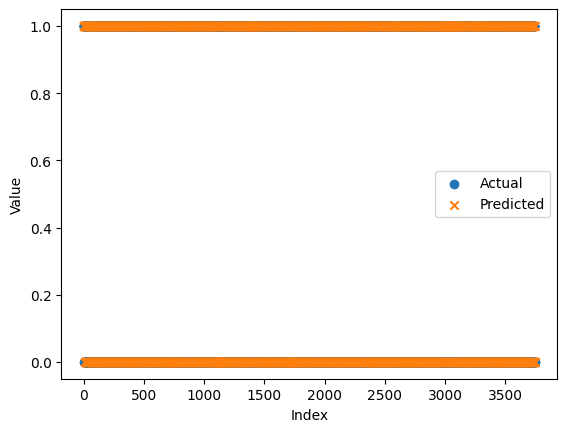

In [77]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the actual and predicted values, respectively

# Plot the values
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_pred)), y_pred, marker='x', label='Predicted')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix
# # Assuming y_test is a pandas Series or DataFrame column
# unique_values = y_test.unique()
# unique_values.sort()

cm = confusion_matrix(y_test, y_pred)
#cm_df = pd.DataFrame(cm, index=[0,1,2], columns=[0,1,2])
cm

array([[1348,  535],
       [ 499, 1363]])

In [81]:
score = accuracy_score(y_test, y_pred)
score

0.7238985313751669

## Benchmark


### RFE

In [202]:

# Split the data into training and testing sets
# X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)

target_var1 = ['Gols 1']
target_var2 = ['Gols 2']
target_var3 = ['Resultado Time 1']

X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
y = ace_df_encoded_cut[target_var3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



In [203]:
X

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,...,CartÃµes vermelhos 1,CartÃµes vermelhos 2,Laterais 1,Laterais 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,...,0.0,0.0,16.0,15.0,77.0,23.0,118,170,21,22
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,...,0.0,0.0,16.0,15.0,44.0,56.0,235,259,10,11
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,...,0.0,0.0,16.0,15.0,58.0,42.0,3,86,23,10
6,2.0,2.0,0.0,1.0,5.0,8.0,1.0,7.0,11.0,8.0,...,0.0,0.0,16.0,15.0,32.0,68.0,86,118,29,22
9,4.0,3.0,2.0,1.0,6.0,2.0,6.0,7.0,21.0,12.0,...,0.0,0.0,16.0,15.0,37.0,63.0,170,3,21,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711,6.0,2.0,1.0,0.0,9.0,6.0,6.0,5.0,7.0,7.0,...,0.0,0.0,15.0,14.0,52.0,48.0,22,41,23,25
27712,6.0,0.0,4.0,3.0,4.0,2.0,8.0,2.0,11.0,9.0,...,0.0,0.0,18.0,9.0,52.0,48.0,20,107,18,24
27713,7.0,7.0,2.0,3.0,10.0,2.0,8.0,0.0,10.0,6.0,...,0.0,0.0,14.0,14.0,55.0,45.0,179,262,23,24
27714,6.0,6.0,1.0,2.0,4.0,3.0,4.0,6.0,5.0,3.0,...,0.0,0.0,9.0,3.0,45.0,55.0,298,178,24,24


In [204]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Definir o estimador
estimator = use_model

# Criar o objeto RFE
rfe = RFE(estimator, n_features_to_select=15)

# Ajustar a RFE aos dados
rfe.fit(X, y)

# Obter os rankings das features
feature_ranking = rfe.ranking_

# Obter as features selecionadas
selected_features = X.columns[rfe.support_]

In [205]:
selected_features

Index(['Chutes a gol 1', 'Chutes a gol 2', 'Impedimentos 1', 'Escanteios 1',
       'Escanteios 2', 'Chutes fora 1', 'Chutes fora 2', 'CartÃµes amarelos 1',
       'CartÃµes amarelos 2', 'Laterais 1', 'Laterais 2', 'Time 1', 'Time 2',
       'Position 1', 'Position 2'],
      dtype='object')

In [ ]:
# Seleção com 10 features

# ['Chutes a gol 1', 'Chutes a gol 2', 'Escanteios 1', 'Faltas 1',
#        'Faltas 2', 'Laterais 1', 'Posse 1(%)', 'Time 1', 'Time 2',
#        'Position 1'],
#       dtype='object'

In [24]:
feature_ranking

array([ 1,  1, 12, 10,  1,  4,  6,  7,  1,  1, 13,  9, 28, 29,  8, 14,  1,
        2, 19, 22, 24, 20, 15, 11, 27, 26, 18, 21, 25, 23, 17, 16,  1,  3,
        1,  1,  1,  5])

### Tunning

In [126]:

# Split the data into training and testing sets
# X = ace_df_encoded.drop(['Resultado Time 1','Gols 1', 'Gols 2'] + , axis=1)

target_var1 = ['Gols 1']
target_var2 = ['Gols 2']
target_var3 = ['Resultado Time 1']

X = ace_df_encoded_cut.drop(target_var1+target_var2+target_var3, axis=1)
y = ace_df_encoded_cut[target_var3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



In [143]:
models = {
    # 'XGBoost': {
    #     'model': XGBClassifier( eval_metric='logloss'),
    #     'params': {
    #         'n_estimators': [50, 100, 200, 300],
    #         'max_depth': [3, 5, 7, 10],
    #         'learning_rate': [0.001,0.01, 0.05, 0.1, 0.3],
    #         'subsample': [0.6, 0.8, 1.0],
    #         'colsample_bytree': [0.6, 0.8, 1.0],
    #         'gamma': [0, 0.1, 0.3, 1],
    #         'reg_alpha': [0, 0.01, 0.1],
    #         'reg_lambda': [0.1, 1, 10],
    #     }
    # },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'n_estimators': [250, 350, 500,700],
            'max_depth': [None, 10, 20, 30, 60, 100],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4, 8 , 12],
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    }
}


In [144]:
for name, mp in models.items():
    print(f"🔍 Treinando {name}...")
    clf = RandomizedSearchCV(
        mp['model'],
        mp['params'],
        n_iter=20,
        scoring='accuracy',
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    clf.fit(X_train, y_train)
    
    best_model = clf.best_estimator_
    test_acc = cross_val_score(best_model, X, y, cv=5).mean()
    
    print(f"✅ {name} - Test Accuracy: {test_acc:.4f}")
    print(f"Best Params: {clf.best_params_}\n")


🔍 Treinando Extra Trees...


/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abraaopc/Documents/projects/PS-2025.1_tango/venv1/lib/python3.10

✅ Extra Trees - Test Accuracy: 0.6947
Best Params: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}



In [137]:
test_acc

np.float64(0.6933491483162798)